In [3]:
%matplotlib inline

In [4]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
INF = 1000000000
n = 2
max_it = 1500
min_alpha = 0.0
max_alpha = 10.0

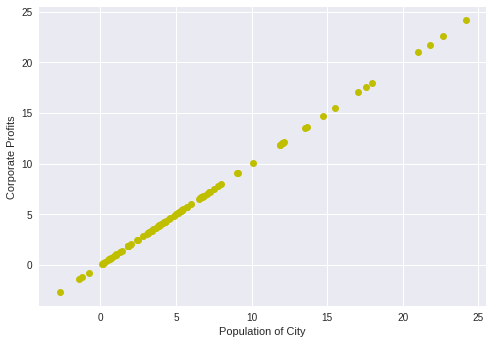

In [6]:
lines = [line.rstrip('\n') for line in open('part1data1.txt')]
NUM_OF_DATA = len(lines)


sample = np.arange(NUM_OF_DATA , dtype='f').reshape( (1, NUM_OF_DATA) )
X = sample.T
Y = sample[0]
for i in range(0,NUM_OF_DATA):
    q = lines[i].split(',')
    X[i][0] = float(q[0])
    Y[i] = float(q[1])
X = np.concatenate((np.ones((1,NUM_OF_DATA)), X.T)).T
XX = np.copy(X)
YY = np.copy(Y)

theta = np.ones(n)
plt.plot(X[:,1], Y, 'yo')
plt.xlabel('Population of City')
plt.ylabel('Corporate Profits')


In [7]:
x_min = X.min(0)
x_max = X.max(0)
x_mean = X.mean(0)
def feature_scale( feature_num, a):
        return (a - x_mean[feature_num]) / (x_max[feature_num] - x_min[feature_num])

In [8]:
def feature_scaling_all(x):
    for j in range(1,n):
        for i in range(0,len(x)):
            x[i][j] = feature_scale(j, x[i][j])

In [9]:
def Incode_features_scaling(vec,theta):
    ans = theta[0]
    for i in range(1,n):
        ans += feature_scale(i , vec[i]) * theta[i]
    return ans

In [10]:
def linear_regression(x , y , n , max_a , min_a):
    m = NUM_OF_DATA
    theta = np.ones(n)
    xT = x.transpose()
    prev_j = -1
    count_it = 0
    exit = False
    while count_it < max_it :
        alpha = (max_a+min_a)/2
        count_it += 1
        h = np.dot(x , theta)
        loss = h - y
        gradient = np.dot(xT , loss)
        theta = theta - alpha * gradient / m
        j = np.sum(loss ** 2) / (2*m)
        
        if prev_j != -1 :
            if prev_j < j :
                max_a = alpha
                theta = np.ones(n)
                prev_j = -1
                count_it = 0                
        prev_j = j;
        if exit == True:
            count_it = max_it
    return theta

In [11]:
feature_scaling_all(X)

In [12]:
def draw_line(theta):
    a = [0,Incode_features_scaling([1,0],theta)]
    b = [30,Incode_features_scaling([1,30],theta)]
    plt.plot([ a[0], b[0] ], [ a[1], b[1] ], 'k-', lw=1)

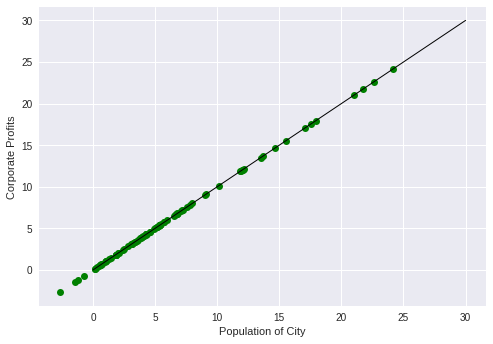

In [13]:
theta = linear_regression(X ,Y ,n, max_alpha , min_alpha)
plt.plot(XX[:,1], YY, 'go')
draw_line(theta)
plt.xlabel('Population of City')
plt.ylabel('Corporate Profits')

به تصویر کشیدن تابع هزینه (امتیازی)

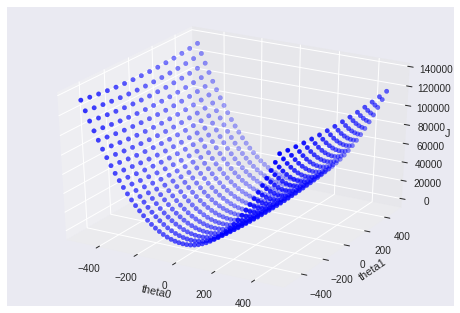

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t0 = []
t1 = []
J = []

for i in range(-500,500,20):
    for j in range(-500,500,70):
        t0 += [i]
        t1 += [j]
        J += [(np.sum((np.dot(X , [i,j]) - Y) ** 2) / (2*NUM_OF_DATA))]
        
ax.scatter(t0, t1, J, c= 'b' , marker = 'o')


ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')

plt.show()